# FIT5149 S1 2020 Assessment 1: Bushfire Analysis using Meteorological Data


Student information
- Family Name: `Chaiyabud`
- Given Name: `Pattranit `
- Student ID: `30304148`
- Student email: `pcha0046@student.monash.edu`

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- `psych`
- `ggplot2`
- `reshape2`
- `GGally`
- `RColorBrewer`
- `gridExtra`
- `corrplot`
- `corrgram`
- `lISLR`
- `car`
- `dplyr`
- `ltidyverse`
- `scatterplot3d`
- `FNN`
- `leaps`
- `glmnet`

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>
This notebook contains the results of exploratory data analysis(EDA) on a set of bush fire data. The goal of this is to build a linear regression model that could be used to predict area of bush fire.

The `first section` shows the exploratory data analysis (EDA) explore and understand the structure and overall data. It investigate each variable in the data set including the distribution of every, also the correlation analysis between each variable. Then summary the finding of this exploration. 

The `second section` shows the development of three different models. It displays how each model is built and the process of development including pros and cons of each model. Then, it shows model performance metric and interpretation. Finally, the keys attributes are identified and conclusion of this data set is provided. 

The dataset provided for the assignment - `forestfires.csv`.

Load the libraries used in the notebook

In [1]:
# Load library
library(psych)
library(ggplot2)
library(reshape2)
library(GGally)
library(RColorBrewer)
library(gridExtra)
library(corrplot)
library(corrgram)
library(ISLR)
library(car)
library(dplyr)
library(tidyverse)
library(scatterplot3d)
library(FNN)
library(leaps)
library(glmnet)

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'GGally' was built under R version 3.6.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'corrgram' was built under R version 3.6.3"
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Warning message:
"package 'ISLR' was built under R version 3.6.3"
Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData


Attaching package: 'car'


The following obj

## 2. Data Exploration<a class="anchor" id="sec_2"></a>
Load data set into environment and start exploring!

In [2]:
# Load the dataset
data <- read.csv("forestfires.csv",header=T)

In [3]:
# Display head and tail
cat("\nThe first few and last few records in the dataset are:")
# Inspect the first few records
head(data, n=3)
# And the last few
tail(data, n=3)

# Display the dimensions
cat("The forestfires dataset has", dim(data)[1], "records, each with", dim(data)[2],
    "attributes. The structure is:\n\n")
# Display the structure
str(data)

# Display stat summary
cat("\nAdvanced statistics for each attribute are:")
# Statistical summary 
round(describe(data), 3)

# Display unique number 
cat("The numbers of unique values for each attribute are:")
# Find unique number of each attribute
apply(data, 2, function(x) length(unique(x)))


The first few and last few records in the dataset are:

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00


The forestfires dataset has 517 records, each with 13 attributes. The structure is:

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...

Advanced statistics for each attribute are:

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255
RH,10,517,44.288,16.317,42.00,42.706,14.826,15.0,100.00,85.00,0.858,0.409,0.718


The numbers of unique values for each attribute are:

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    9     7    12     7   106   215   219   119   192    75    21     7   251

### Summary of Attributes

The following table identifies which attributes are numerical and whether they are continuous or discrete, and which are categorical and whether they are nominal or ordinal. It includes some initial observations about the ranges and common values of the attributes.

|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|X         |Categorical|Ordinal  |**x-axis spatial coordinate** within the Montesinho park map: 1 to 9 with 9 unique value.|
|Y      |Categorical |Ordinal|**y-axis spatial coordinate** within the Montesinho park map: 2 to 9 with 7 unique value.| 
|month   |Categorical |Ordinal  |**month of the year**: "jan" to "dec" with 12 unique value.                                |
|day  |Categorical |Ordinal  |**day of the week**: "mon" to "sun" with 7 unique value.|
|FFMC|Numerical  |Continuous|**FFMC index** from the FWI system:Ranges from 18.7 to 96.20 with the distribution of the data is highly *skewed to the left* and pointy. |
|DMC  |Numerical  |Continuous|**DMC index** from the FWI system:Ranges from 1.1 to 291.3          |
|DC |Numerical|Continuous  |**DC index** from the FWI system:Ranges from 7.9 to 860.6 with the distribution of the data *skewed to the left*, also it has *highest standard deviation* thus could have some outliers due to this large range.            |
|ISI |Numurical|Continuous   |**ISI index** from the FWI system:Ranges from 0.0 to 56.10 with the distribution of the data *skewed to the right* and pointy.                                         |
|temp    |Numerical|Continuous  |**temperature** in Celsius degrees:Ranges from 2.2 to 33.30 and the distribution of the data *slightly skewed to the left*.|
|RH |Numerical  |Continuous  |**relative humidity** in %:Ranges from 15.0 to 100.                                                       |
|wind  |Numerical|Continuous  |**wind speed** in km/h:Ranges from 0.40 to 9.40.     
|rain|Numerical|Continuous|**outside rain** in mm/m2 :Ranges from 0.0 to 6.4 with the distribution of the data *heavily skewed to the right* and pointy. It has *lowest standard deviation*
|area|Numerical|Continuous|**Target variable - the burned area of the forest** (in ha):Ranges from 0.00 to 1090.84 with the distribution of the data *heavily skewed to the right*(0) and pointy. it may make sense to model with the logarithm transform Probably has outliers - especially high ones. However, trimmed mean of this variable differ significantly from the mean. This suggests that removing outlier using this method might not be the case for area.|

### Investigate Distribution of Each Variable
#### Let start with target variable: **area**

In [4]:
attach(data)

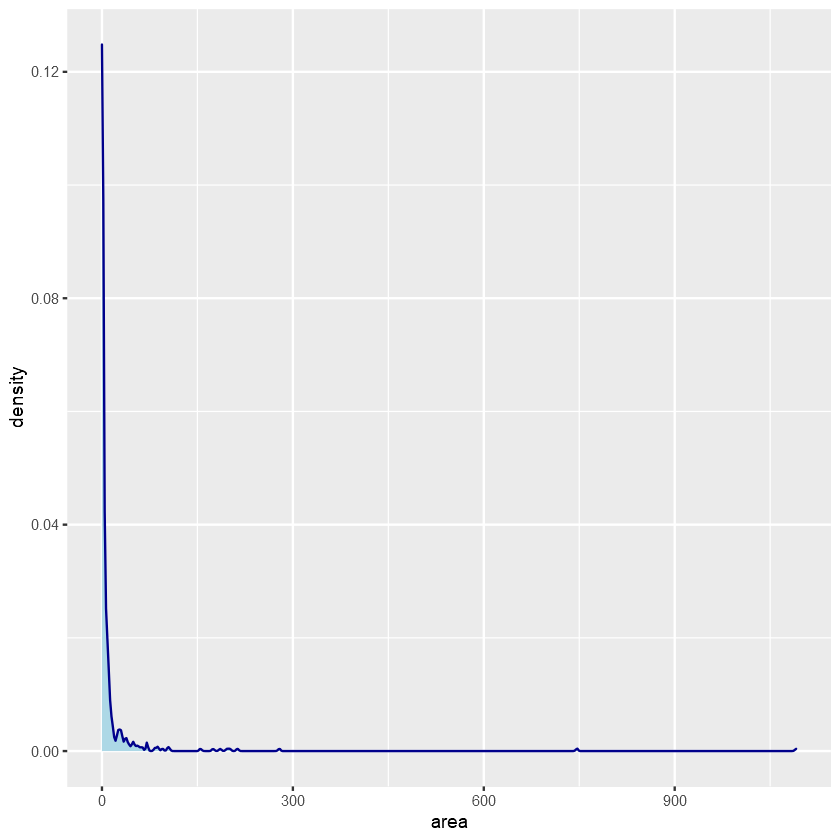

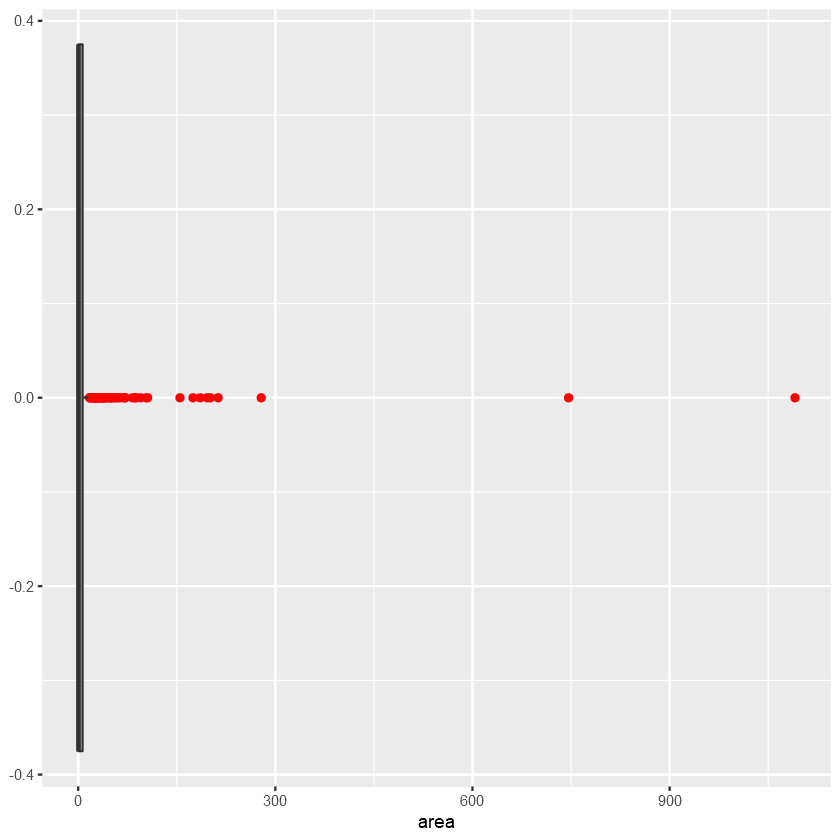

In [5]:
# plot density graph of area
ggplot(data, aes(x=area)) + geom_density(color="darkblue", fill="lightblue")
# plot box plot of area
ggplot(data, aes(y=area)) + geom_boxplot(outlier.colour="red", outlier.shape=16, outlier.size=2, notch=FALSE)+ coord_flip()

The graphs show:
- The data is **highly skewed** as mentioned above in summary of attribute
- This can tell you that only **some part of the forest caught fire in a large area**(hectare), most of the fire cover less than 100 hectares of land.
- **Tranformation** could be applied to reduce the skewnesss and kurtosis, however we need to inverse transform back after prediction for true output.
- There are a few point that look like an **outlier** in the area columns. (The questions is should we drop it or not? Will try transformation first, if it doesn't work then might remove) 

#### View the variable distributions using boxplots
See the boxplot of all numerical variable

No id variables; using all as measure variables



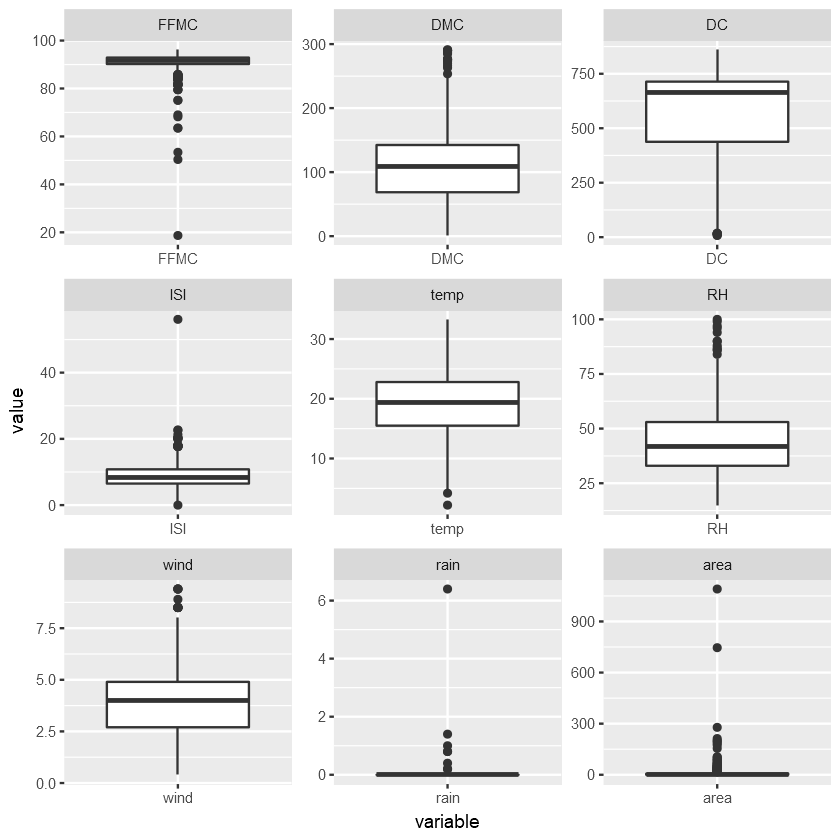

In [6]:
# Build another dataframe
m1 <- melt(as.data.frame(data[,c(-1, -2, -3, -4)]))

# Generate box plots of all variables except X, Y, month, day
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})       

#### View the variable distributions using histograms and bar charts
See the distribution of all variables

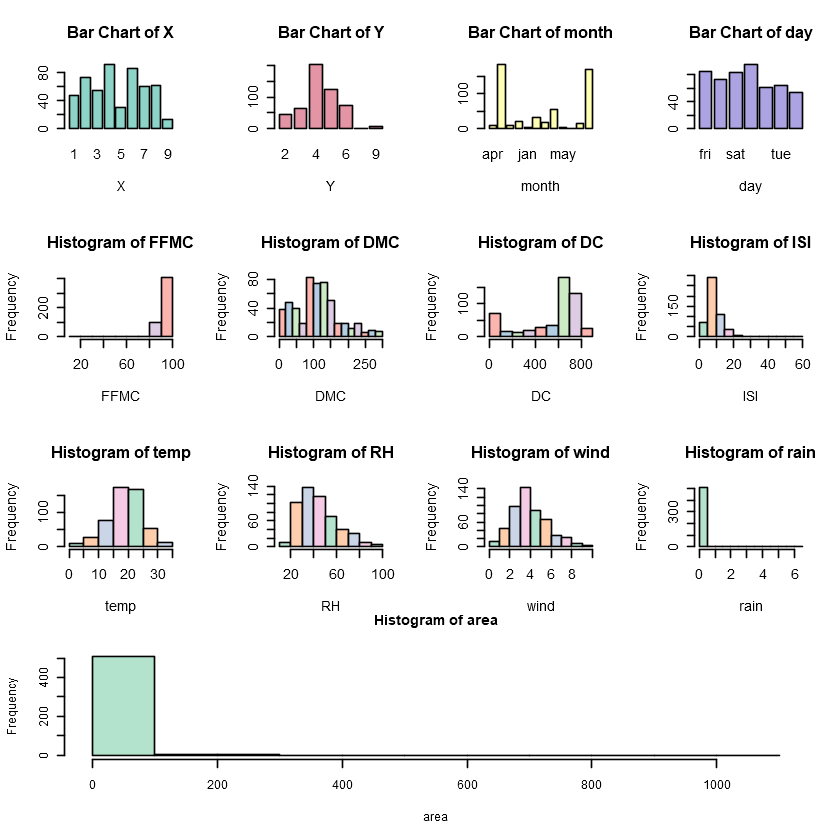

In [7]:
# Set some colours using Colorbrewer
pas1 <- brewer.pal(4,'Pastel1')
pas2 <- brewer.pal(4,'Pastel2')

# Plot a histogram or bar chart of each variable
par(mfrow = c(4,4))

# Bar chart for categorical variable
plot(as.factor(X),main="Bar Chart of X", xlab='X', col='#8DD3C7')
plot(as.factor(Y),main="Bar Chart of Y", xlab='Y', col='#E495A5')
plot(as.factor(month),main="Bar Chart of month", xlab='month', col='#FFFFB3')
plot(as.factor(day),main="Bar Chart of day", xlab='day', col='#ACA4E2')

# Histogram for numerocal variable
hist(FFMC, main='Histogram of FFMC', xlab='FFMC', col=pas1)
hist(DMC, main='Histogram of DMC', xlab='DMC', col=pas1)
hist(DC, main='Histogram of DC', xlab='DC', col=pas1)
hist(ISI, main='Histogram of ISI', xlab='ISI', col=pas2)     
hist(temp, main='Histogram of temp', xlab='temp', , col=pas2)
hist(RH, main='Histogram of RH', xlab='RH', , col=pas2)
hist(wind, main='Histogram of wind', xlab='wind', col=pas2)
hist(rain, main='Histogram of rain', xlab='rain', col=pas2)

# Plot histogram of area on a separate row
par(fig=c(0,1,0,0.30),ps=10,new=TRUE)
hist(area, main='Histogram of area', xlab='area', col=pas2)

These graphs both boxplot and histogram show:
- `ISI`, `rain` and `area` all have large positive skews. The possible way to deal with right skewed is log or square root transform.
- A great number of bush fire occurs in some `month` more than in others so some months might be significant but some are not.
- There are not much different regarding the `day` of fire in a week yet the highest ranges are in Sunday, Friday, Saturday and Monday respectively(weekend has high probablility but not a strong indication)
- Bush fire occurs most only in some positions in both `X` and `Y`. This implies some point is a saver than another.
- Only `FFMC` heavily skewed to the left. Square transform might improve the distribution
- `temp`, `RH`(relative humidity) and `wind` speed are almost symetric (a little bit skewness)
- There is possibility that some extreme data point with high leverage could affect when making a model so now let see if the transformation works (focus on FFMC, ISI, rain and area since they have obvious outlier in the boxplot)


#### Apply transformation to deal with skewness and kurtosis 
Replot FFMC, ISI, rain and area using a log scale except FFMC using square to see if these variables have a normal trend

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 509 rows containing non-finite values (stat_bin)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 247 rows containing non-finite values (stat_bin)."


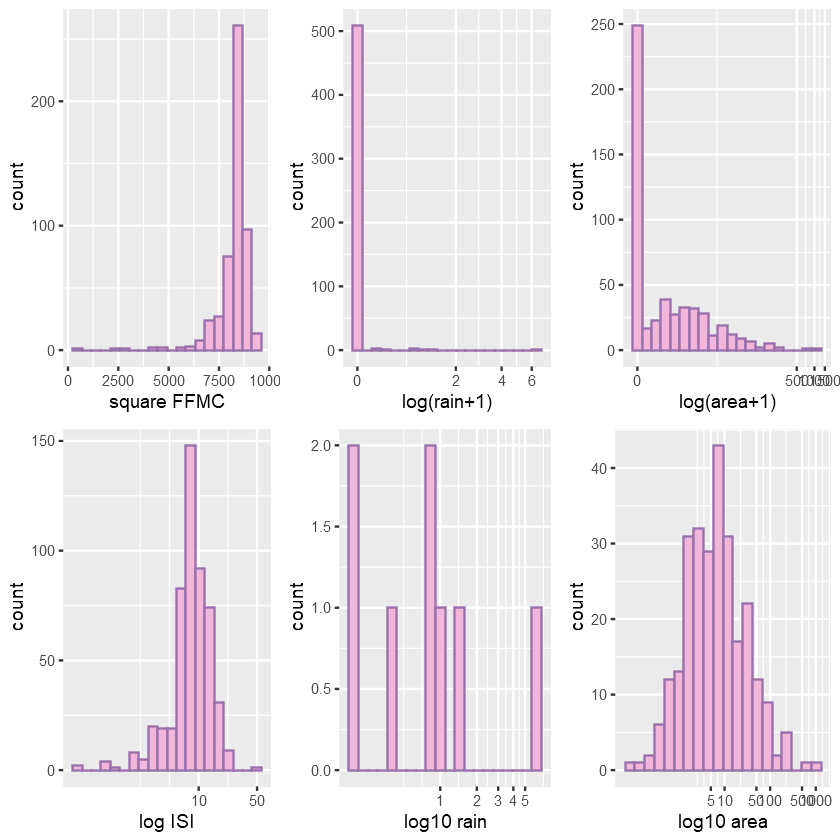

In [8]:
# Set some colours using Colorbrewer
crust <- brewer.pal(11,"PRGn")[3]
col <- brewer.pal(11,"PiYG")[4]

# Re-plot some of the charts using log scales and square for FFMC to counteract the skew
p1 <- ggplot(aes(x=FFMC^2),data=data) + xlab('square FFMC')+
      geom_histogram(bins=20, colour=crust, fill=col) 

p2 <- ggplot(aes(x=rain), data=data) + xlab('log(rain+1)')+
      geom_histogram(bins=20, colour=crust, fill=col) + 
#       scale_x_log10(labels=waiver() ,breaks=c(0, 1, 2, 3, 4, 5))
      scale_x_continuous(trans = "log1p")

p3 <- ggplot(aes(x=area), data=data) + xlab('log(area+1)')+
      geom_histogram(bins=20, colour=crust, fill=col) +
#       scale_x_log10(labels=waiver() ,breaks= c(5, 10, 50, 100, 500, 1000))
      scale_x_continuous(trans = "log1p")

p4 <- ggplot(aes(x=ISI), data=data) + xlab('log ISI')+
      geom_histogram(bins=20, colour=crust, fill=col)+ 
      scale_x_log10(labels=waiver() ,breaks= c(10, 50))
#     scale_x_continuous(trans = "log1p")

p5 <- ggplot(aes(x=rain), data=data) + xlab('log10 rain')+
      geom_histogram(bins=20, colour=crust, fill=col) + 
      scale_x_log10(labels=waiver() ,breaks=c(0, 1, 2, 3, 4, 5))
#       scale_x_continuous(trans = "log1p")

p6 <- ggplot(aes(x=area), data=data) + xlab('log10 area')+
      geom_histogram(bins=20, colour=crust, fill=col) +
      scale_x_log10(labels=waiver() ,breaks= c(5, 10, 50, 100, 500, 1000))
#       scale_x_continuous(trans = "log1p")

grid.arrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2)

These graphs show:
- The `square of FFMC` don't look quite normal, though there is a bit improvement, it is still skew to one side. So removing outlier might help. 
- The `log of ISI` show some improvement of the distribution which is still skewed a little bit left.
- For rain and area since both contain value 0, we try using two type of log transformations. One is log(x+1) and the other is log based 10.
- The first `log(x+1) transformation of rain`, it shows that rain is still heavily skewed to the right as there are so many zero, in other word, it can be said that it doesn't rain when forest catch fire. This factor can be converted into categorical since most of them or 509 out of 517 total are 0. we shall see.
- The second `log10 transformation of rain`, it remove almost all and return a strange distribution as only a couple of row are left. As we all know, rain is in the percentage form but it has only 7 unique value, taking one out(take 0 out) we have only 6 unique value of 7 rows left so it is not quite an idea. Let see in the next section if rain has strong or weak correlation with area.
- Like rain variable, apply `log(area+1)` since it has 247 rows of 0 in area which is half of total dataset. It clearly shows that area still heavily skewed to the right as expected. However, if we transform using `log10(area)`, it remove all 0 and the distribution becomes a bell shape which look good. One question: Should we separate into two predictions between zero and non-zero? or Should we remove outlier in area and make one model prediction? We shall see in the next part. 

Apart from transformation above, we have tried reverse and square root transformation. Both don't make any satisfied improvement.

### Investigate Pairs of Variables
Next we will see the correlation between each variable

#### Produce a scatterplot matrix which includes all of the variables in the data set. 

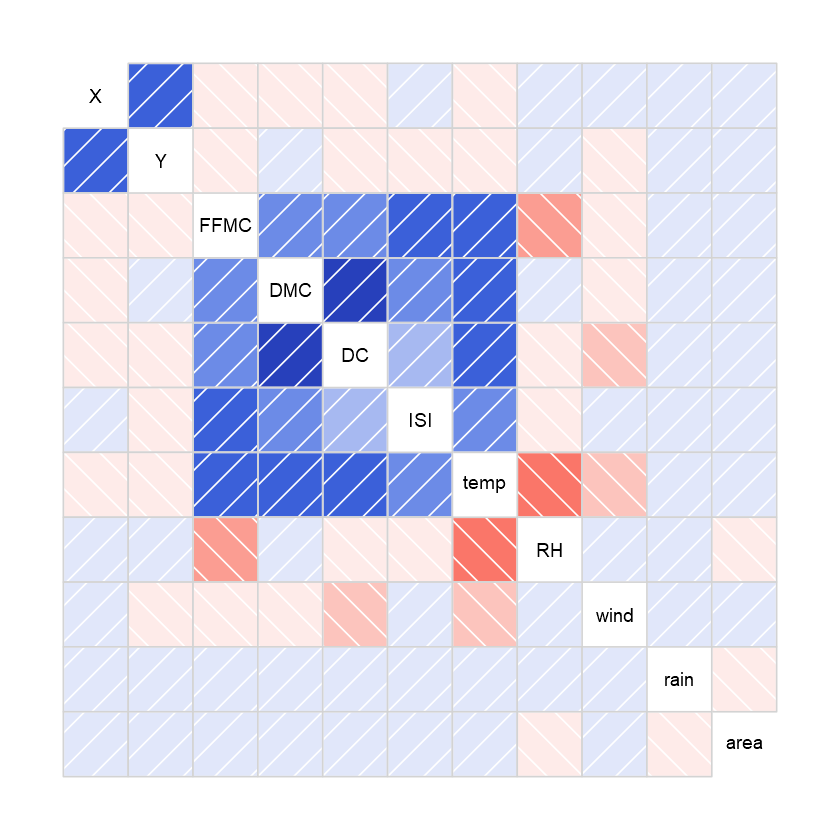

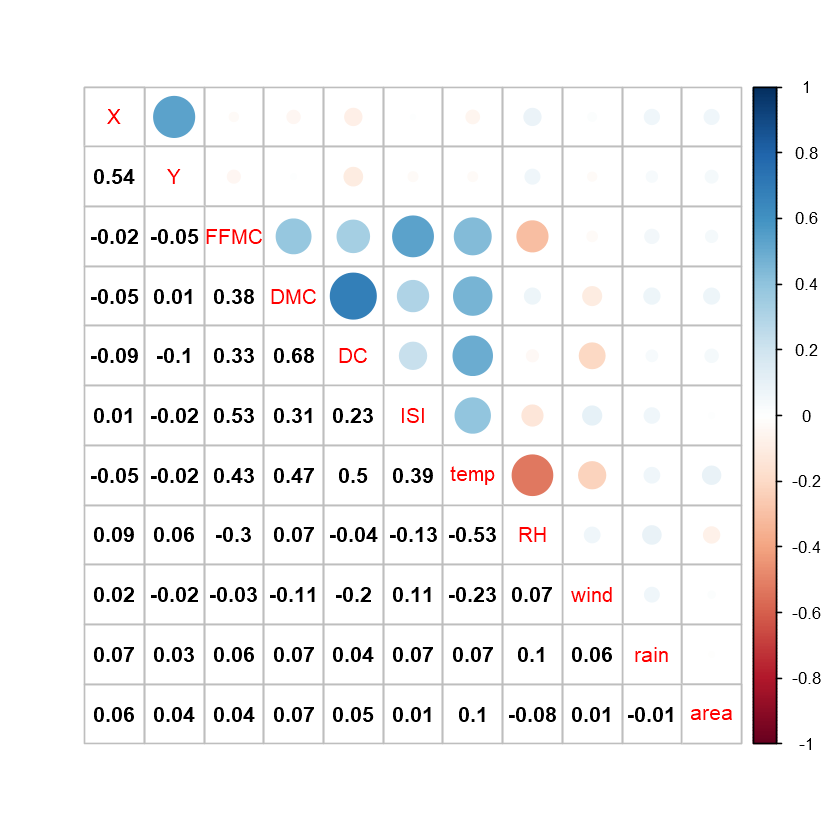

In [9]:
# Plot correlation matrix of all variable
corrplot.mixed(corrgram(data), lower.col = "black", number.cex = 1)

The correlation matrix shows:
- The `area` has very little correlation to every other variable in comparison
- There is a moderate correlation between `X` and `Y`
- `FFMC`, `DMC`, `DC`, `ISI` and `temp` are all correlated to each other and they are all positive correlation
- `RH` has nagative correlation to FFMC and temperature
- `wind` speed has weak correlation with temperature and DC
- `Y`, `rain` and `area` are least correlate to other variables

The top positive correlations are between:
- DMC and DC
- X   and   Y
- FFMC and ISI
- temp and DC
- DMC and temp

The only significant negative correlation is between:
- temp and RH 

Therefore, bush fire with high temperature reflect low relative humidity. 
As you can see the correlation between dependent and all independent variable are so weak, only `temp, RH and DMC that have comparatively strong correlation with area`.
#### The correlation between DMC index, DC index, FFMC, ISI, temperature relative, humidity(RH),  wind speed and area
Let investigate the relationship between these top correlation

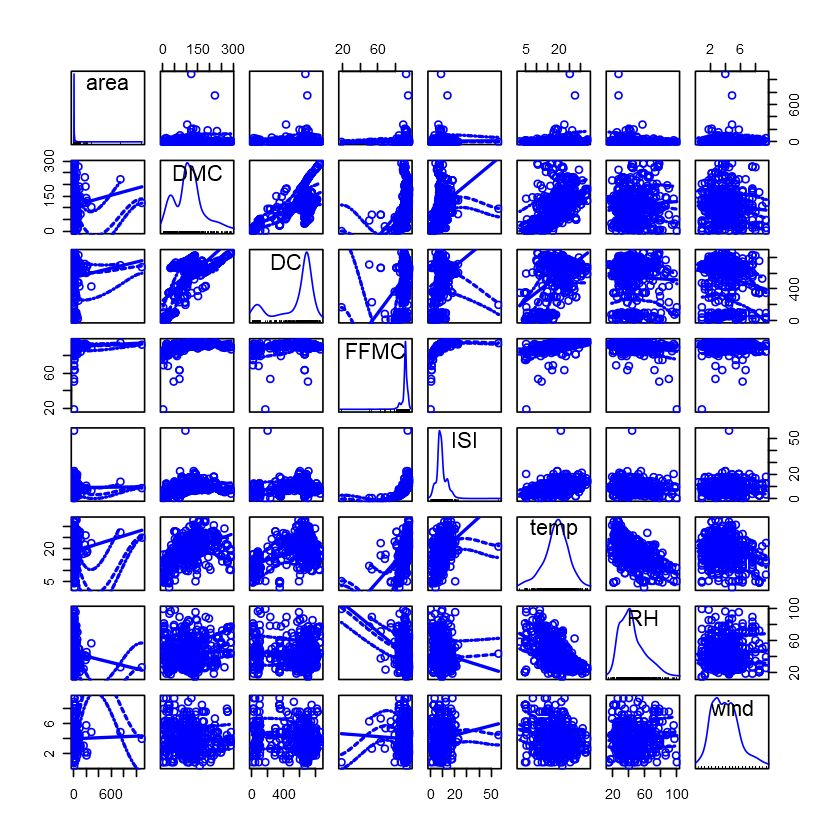

In [10]:
# scatter plot matrix
scatterplotMatrix(~area+DMC+DC+FFMC+ISI+temp+RH+wind,data=data)

The scatterplot matrix shows many of these relationships are non-linear 
- It looks like there is a `positive` linear trend between `DMC` and ``DC
- Also, a clear `negative` linear association in `RH` and `temp`
- It is kind of `positive` linear relationship with `temp, DC and DMC`

As you can see, it is hard to say something about linear relationship of area which is our target and others since there is obvious outlier and there are a number of 0. Therefore, we shall try **plotting log of area** and see how it goes.

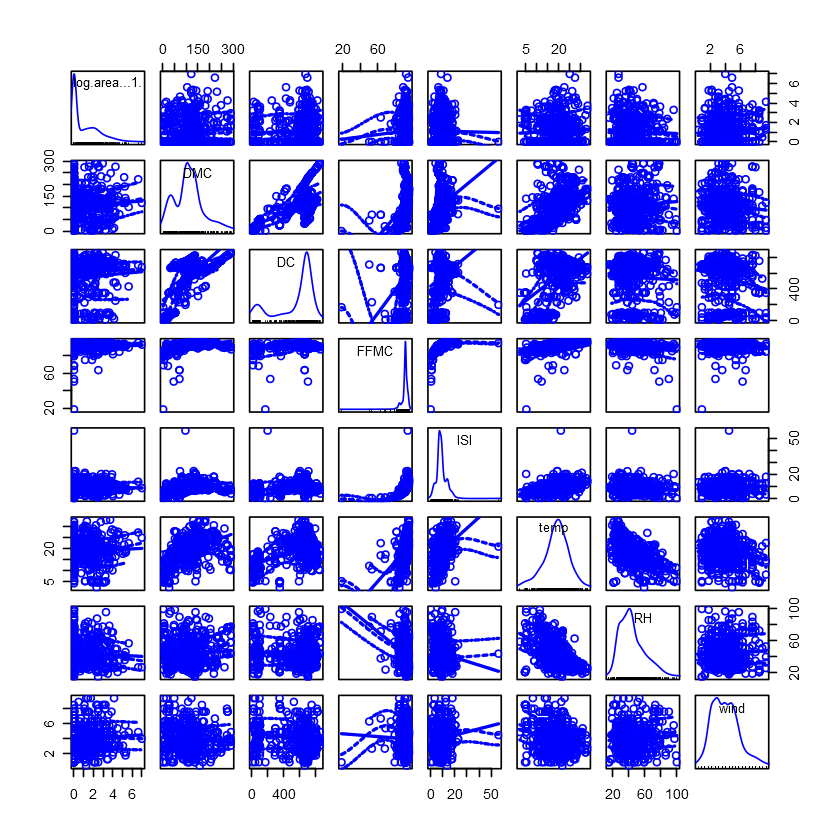

In [11]:
# scatter plot matrix
scatterplotMatrix(~log(area+1)+DMC+DC+FFMC+ISI+temp+RH+wind,data=data)

From the graph above, it shows **better distribution shape** and we can see some lines. FFMC and ISI seems to have linear relationship of log area with positive slope and some data point away from the trend but not very clear so it is still hard to tell linear relationship of area. 

#### Re-format Data for Further Analysis
Factorise the categorical variables and melt the data for visualisation, then try what if we make rain into categorical data(will this improve correlation with the target variable?) and try remove outlier for FFMC 

In [12]:
# Make rain into categorical of rain if more than 0
data$cat_rain[data$rain == 0 ] = "no rain"
data$cat_rain[data$rain > 0 ] = "rain"

# Turn into factor variable
data$X = as.factor(data$X)
data$Y = as.factor(data$Y)
data$month = factor(data$month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))
data$day = factor(data$day, levels = c("mon", "tue", "wed", "thu", "fri", "sat", "sun"))
data$cat_rain =as.factor(data$cat_rain)

# Make new dataframe using factors as id variable
m1 = melt(as.data.frame(data))

Using X, Y, month, day, cat_rain as id variables



After transformation, the distribution of FFMC doesn't improve so we decided to remove outlier (FFMC has comparatively moderate correlation with the target). 

In [13]:
# find upper bound and lower bound to remove outlier
Q = quantile(data$FFMC, probs=c(.25, .75), na.rm = FALSE)
iqr = IQR(data$FFMC) # IQR
up =  Q[2]+1.5*iqr # Upper Range  
low = Q[1]-1.5*iqr # Lower Range
# uncomment to see outlier
# outlier = boxplot(data$FFMC, plot=FALSE)$out

# Remove outlier
m1 = m1[!(m1$variable == 'FFMC' & (m1$value > up | m1$value < low)),]
# Show how new dataframe look like
head(m1)

X,Y,month,day,cat_rain,variable,value
7,5,mar,fri,no rain,FFMC,86.2
7,4,oct,tue,no rain,FFMC,90.6
7,4,oct,sat,no rain,FFMC,90.6
8,6,mar,fri,rain,FFMC,91.7
8,6,mar,sun,no rain,FFMC,89.3
8,6,aug,sun,no rain,FFMC,92.3


#### Show how Month is Related to other Variables
Let investigate the correlation and relationships of month with other variables using boxplot.

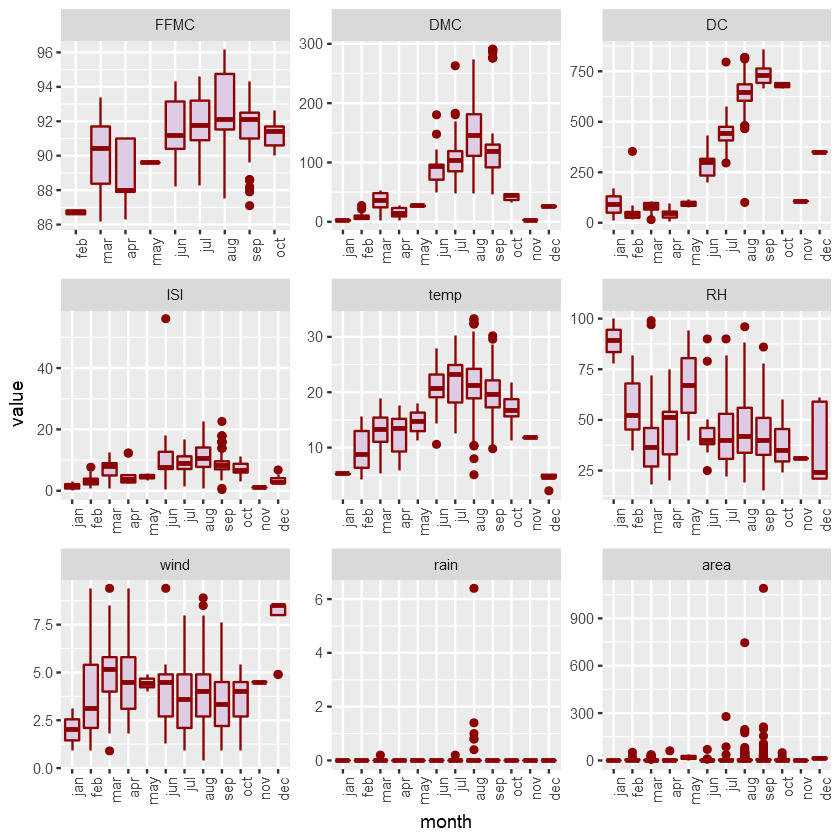

In [14]:
# Set some colours using Colorbrewer
pas1 <- brewer.pal(4,'Pastel1')[4]
# Plot box plot
ggplot(m1, aes(x = month,y = value))+
facet_wrap(~variable, scales='free') +
geom_boxplot(fill=pas1, color='darkred') +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

From beginning of the year to the end:
- `DC` increase and reach its peak around August and September (This look like a trend in a year), then drop in the end 
- `DMC` and `temp` also have the similar trend that it starts from low to peak around August
- the forest seem to be most humid(`RH`) in January, other month relative humidity level is wide spread. 
- `ISI` doesn't vary much yet it is high in August and September
- notice that Relative humidity has negative relation with `wind` speed. while RH decrease along the year, wind speed is likely to increase

#### Show how day is Related to other Variables
These boxplots investigate correlation between day and other variables.

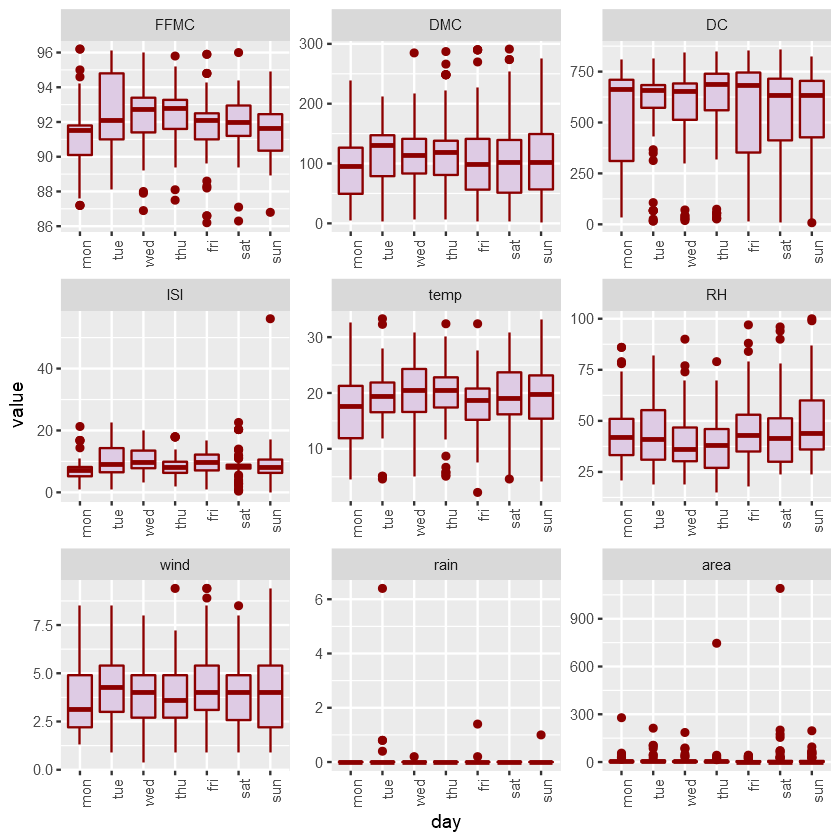

In [15]:
# Set some colours using Colorbrewer
pas1 <- brewer.pal(4,'Pastel1')[4]
# Plot box plot
ggplot(m1 ,aes(x = day,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot(fill=pas1, color='darkred') +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

During the week:
- The value of each variable in everyday is not much different as the median of them are almost at the same level.
- This mean it doesn't matter what `day` in a week, fire can occur on any day.

#### Show how X and Y is Related to area
This coordinate map investigate correlation between X, Y and area.

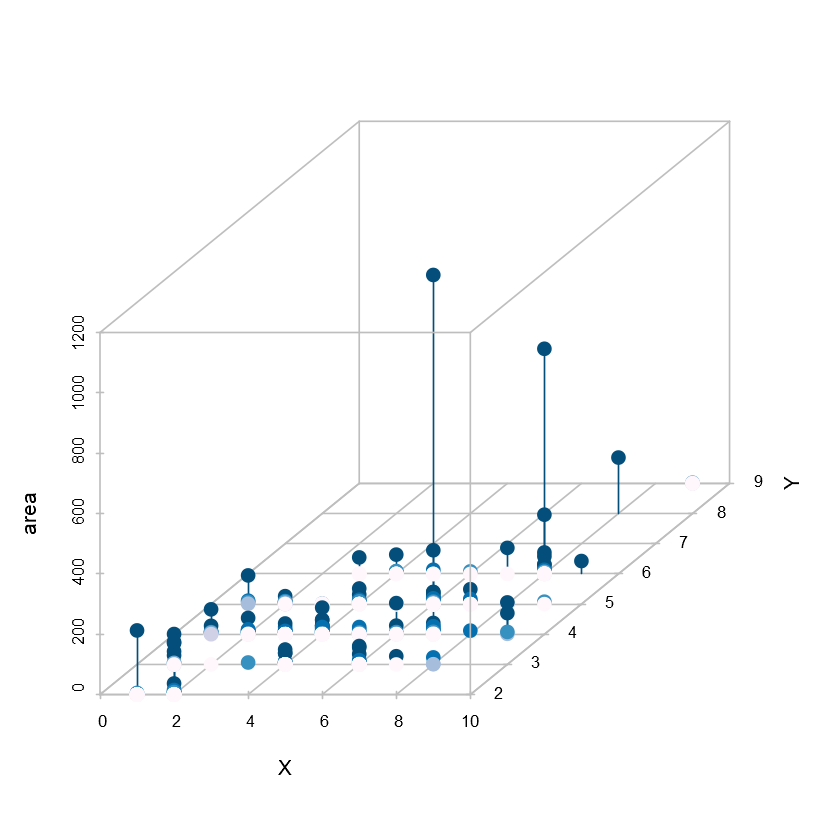

In [16]:
# get colors for labeling the points
area <- data$area # pick a variable to plot
nclr <- 8 # number of colors
plotclr <- brewer.pal(nclr,"PuBu") # get the colors
colornum <- cut(rank(area), nclr, labels=FALSE)
colcode <- plotclr[colornum] # assign color

# X Y plot
plot.angle <- 45
scatterplot3d(X, Y, area, type="h", angle=plot.angle, color=colcode, pch=20, cex.symbols=2, 
  col.axis="gray", col.grid="gray")

Position `X5` to `X8` seem to have most fire probability with large burning area. More over, position `Y6` and `Y8` have the highest burning area which might be influential points that affect the model. 

#### Show how rain as category is Related to other Variables
If rain is treated as categorical variable, these boxplots investigate correlation between rain and other variables.

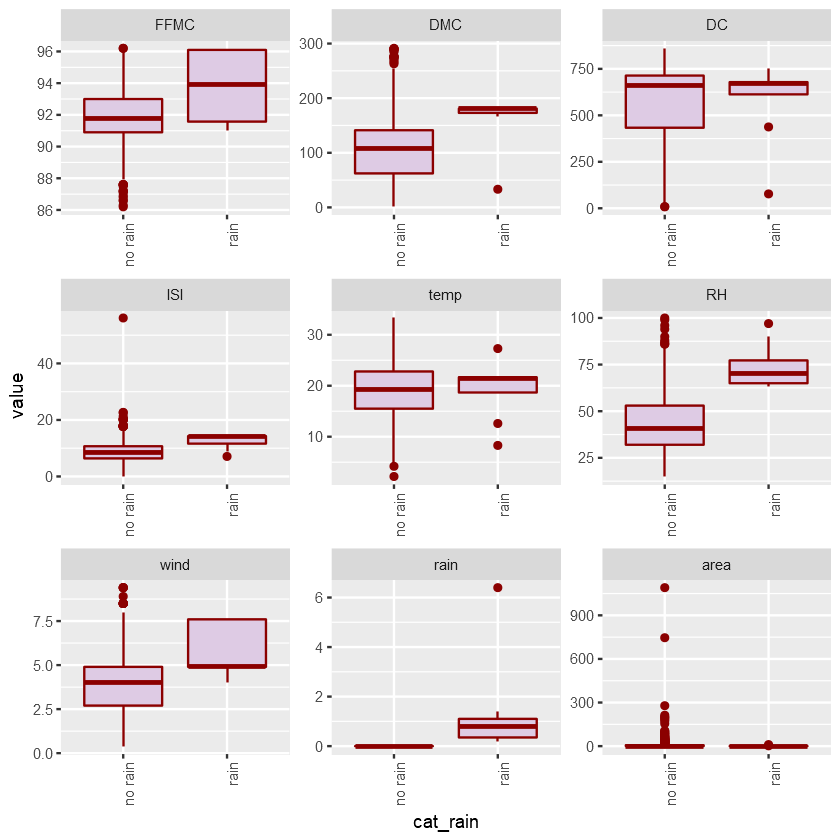

In [17]:
# Set some colours using Colorbrewer
pas1 <- brewer.pal(4,'Pastel1')[4]
ggplot(m1 ,aes(x = cat_rain,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot(fill=pas1, color='darkred') +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

From the plot:

It shows that the range of all variable of `no rain` is wide spread, in other words, it could be any value of any variable. As most observations are no rain, it is hard to tell the which range of variable `rain`. Therefore, it can be said that this parameter is not much important, as you can see from the table below, all area where it rain is very small.

In [18]:
# Subset of data where rain >0
data[data$cat_rain == 'rain',]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cat_rain
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,rain
244,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00,rain
287,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00,rain
500,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,rain
501,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,rain
502,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,rain
503,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00,rain
510,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,rain


#### Month variable
Look a bit deeper into month

In [19]:
# See how many are there of each month
cat('Number of area in each month:')
data %>% count(month)
# data[data$month == 'jan',]
# data[data$month == 'may',]
# data[data$month == 'nov',]

Number of area in each month:

month,n
jan,2
feb,20
mar,54
apr,9
may,2
jun,17
jul,32
aug,184
sep,172
oct,15


According to the box plot of month in previous section, we can see that some months have less effect than the other month and from the table above, `January`, `May` and `November` have only 2 to 1 observations. It can be interpret in two ways. One there are very less possibility of fire in those months indicating the observations can be ignored. The other way is the not all data in those months are collected. Yet after we look into area of those month, only one of may has area that is more than zero. Therefore, for the sake of a good model and sampling, we could drop jan and nov or make it in other way such as seasonal month.

### Summary

#### Analysis of Variable

The provided forest fire data has 517 records with 13 attributes for each record. The provided descriptions for each attribute and some additional notes are:

1. `X`: some coordinate x might be important to burning area, however, it doesn't tell how large the burning area is
2. `Y`: like X, some coordinate Y might have correlation with burning area, but it doesn't tell the burning area
3. `month`: some month such as August and September have high chance of burning. It could be a good identifier 
4. `day`: day has weak correlation with area 
5. `FFMC`: FFMC index has the widest range of data after removing outlier, we can see that FFMC is high around August and September
6. `DMC`: DMC index has comparatively high correlation with burning area and this index is high when it burns
7. `DC`: DC index has lower association with area comparing to DMC index, yet it is highly correlated to DMC (interaction between these two)
8. `ISI`: ISI index
9. `temp`: temperature has the highest correlation with burning area. Usually when it burns, temperature goes high
10. `RH`: Relative humidity also second highly correlated to area, but it has negative correlation with temp
11. `wind`: wind doesn't tell anything much
12. `rain`: usually it doesn't rain in the dataset so it is not an important feature
13. `area`: area is correlated to temperature, RH, DMC the most, but half of area are 0

## 3. Model Development<a class="anchor" id="sec_3"></a>
### Prepare the Data Frame

Prepare the data frame by encoding the categorical variables and split the dataset into training and test datasets.
fit the model to training dataset, perform prediction on test dataset and finally compute some performance metrics

In [20]:
# Load data once again
data <- read.csv("forestfires.csv",header=T)
# Make factor variables
data$X = as.factor(data$X)
data$Y = as.factor(data$Y)
data$month = as.factor(data$month)
data$day = as.factor(data$day)

# Encoding factor variable
contrasts(data$month) = contr.treatment(length(unique(data$month)))
contrasts(data$day) = contr.treatment(length(unique(data$day)))
contrasts(data$X) = contr.treatment(length(unique(data$X)))
contrasts(data$Y) = contr.treatment(length(unique(data$Y)))

# data = data[!data$FFMC %in% boxplot.stats(data$FFMC)$out, ]

In order to conduct analysis of model performance, split the data into `training dataset(80%)` and `testing dataset(20%)` before starting

In [21]:
# Split dataset as 80% training and 20% testing
smp_siz = floor(0.80*nrow(data))  # creates a value for dividing the data into train and test. 
cat('The taining dataset size is', smp_siz,'\n')   # shows the value of the train size
cat('The test dataset size is', dim(data)[1]-smp_siz) # shows the value of the test size
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(data)),size = smp_siz)  # Randomly identifies the rows equal to train size 
train =data[train_ind,] #creates the training dataset with row numbers stored in train_ind
test =data[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

The taining dataset size is 413 
The test dataset size is 104

### Define some Functions

Build function to use during model development to evaluate some of the model accuracy. 

#### Function to Calculate Model Accuracy Statistics

Name: Model.Accuracy

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 
- df - the degrees of freedom
- p - the number of parameters excluding the coefficient

Return Value:

A list containing:
- rsquared - the R-Squared value calculated from the predicted and target values
- rse - the residual standard error
- f.stat - the F-statistic

Description:

Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the statistics according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- Residual standard error - $\sqrt{\frac{1}{df}RSS}$
- F-statistics - $\frac{(TSS - RSS)/p}{RSS / df}$


In [22]:
Model.Accuracy <- function(predicted, target, df, p) { 
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

#### Function to Calculate RMSE

Name: RMSE

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 

Return Value:

The RMSE value calculated from the predicted and target values

Description:

Calculate the RMSE value: $RMSE = \sqrt {\sum_{i=1}^n (\hat y_i - y_i)^2 / N}$

In [23]:
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

#### Assumptions of Multiple Linear Regression
Before building models, we should acknowledge the assumption first. <br>
- `Linearity`: there should be linear relationship betWeen response variable and predictor variable >> *Residual vs Fitted*
- `Nearly Normal Residual`: residual must be independent and normally distributed >> *Normal Q-Q*
- `Homoscedasticity`: the variance must be constant >> *Scale-Location*

### First Model
Try fitting all variables to see what appears to be important assuming linear assumption

In [24]:
# Fit first model and summarize
fit1 = lm(area~., data = train)
summary(fit1)

Warning message:
"contrasts dropped from factor month due to missing levels"



Call:
lm(formula = area ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -65.51  -18.14   -5.55    5.58 1021.10 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -4.29812   96.36381  -0.045   0.9644  
X2           -3.36624   14.72943  -0.229   0.8194  
X3           -3.67109   16.94117  -0.217   0.8286  
X4            4.92484   15.42509   0.319   0.7497  
X5           -2.11599   20.71842  -0.102   0.9187  
X6           16.61775   16.28563   1.020   0.3082  
X7           -5.22246   16.96143  -0.308   0.7583  
X8           10.74290   22.00212   0.488   0.6256  
X9           25.87672   31.59625   0.819   0.4133  
Y2          -17.60508   18.33181  -0.960   0.3375  
Y3          -11.28163   15.76135  -0.716   0.4746  
Y4           -9.88931   16.45220  -0.601   0.5481  
Y5           -2.43615   23.18290  -0.105   0.9164  
Y6          141.66330   75.28130   1.882   0.0606 .
Y7          -41.76128   45.70447  -0.914   0.3615  
monthaug     60

From the model:
- The `adjusted R-squared ($R^2$)` value indicates this model is -1.569 which means the explanation toward the response variable is very low or negligible, more over Multiple R-squared is just 7.7799% which is also low. (This model doesn't explain anything if unseen data come in)

- The `F-statistic` 0.8325 has a p-value 0.7503 - so  can't reject the null hypothesis (There is no linear relationship between dependent and independent variables) - the model is not useful

- The `p-values` for the coefficients show that almost all of the variables are significant at ant case. Only **DMC** is significant at the 0.05 level. Apart from that, DM plus some day, month and y are the significant at the 0.1 level. Note that both DMC and DM variables have the highest paired correlation among all variable. The reason why some days, months and y become significant might be because of in this training set there are comparatively large number of those observations or comparatively moderate correlation with area.

- `Residual standard error` which is a goodness-of-fit indicating that actual area deviate from the true regression line by approximately 70.04 hectares, on average which is quite high. 

Use step to remove unimportant variables

In [25]:
# Using step and summarize
fit1 = step(fit1)
summary(fit1)

Start:  AIC=3546.82
area ~ X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + 
    wind + rain

        Df Sum of Sq     RSS    AIC
- X      8     18063 1853010 3534.9
- month 10     41231 1876179 3536.0
- day    6     22154 1857102 3539.8
- Y      6     29377 1864324 3541.4
- rain   1         0 1834948 3544.8
- FFMC   1       220 1835167 3544.9
- ISI    1       269 1835217 3544.9
- RH     1       455 1835403 3544.9
- wind   1      4670 1839617 3545.9
- temp   1      6351 1841299 3546.2
<none>               1834948 3546.8
- DC     1     17276 1852223 3548.7
- DMC    1     21119 1856067 3549.5


Warning message:
"contrasts dropped from factor month due to missing levels"



Step:  AIC=3534.87
area ~ Y + month + day + FFMC + DMC + DC + ISI + temp + RH + 
    wind + rain

        Df Sum of Sq     RSS    AIC
- month 10     37675 1890685 3523.2
- day    6     23643 1876653 3528.1
- Y      6     39710 1892720 3531.6
- rain   1        11 1853021 3532.9
- FFMC   1       236 1853247 3532.9
- ISI    1       516 1853526 3533.0
- RH     1       572 1853582 3533.0
- wind   1      4630 1857641 3533.9
- temp   1      6708 1859718 3534.4
<none>               1853010 3534.9
- DC     1     13285 1866295 3535.8
- DMC    1     16766 1869777 3536.6

Step:  AIC=3523.18
area ~ Y + day + FFMC + DMC + DC + ISI + temp + RH + wind + rain

       Df Sum of Sq     RSS    AIC
- day   6     20162 1910847 3515.6
- Y     6     41727 1932412 3520.2
- FFMC  1       237 1890922 3521.2
- rain  1       304 1890989 3521.2
- DC    1       466 1891151 3521.3
- ISI   1      1272 1891957 3521.5
- temp  1      1607 1892292 3521.5
- DMC   1      2342 1893028 3521.7
- wind  1      4178 1894863 3522


Call:
lm(formula = area ~ DMC + RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -33.88  -16.61  -10.74   -2.14 1069.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 19.86919   10.99774   1.807   0.0715 .
DMC          0.09857    0.05307   1.857   0.0640 .
RH          -0.39191    0.20621  -1.901   0.0581 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69.12 on 410 degrees of freedom
Multiple R-squared:  0.01566,	Adjusted R-squared:  0.01086 
F-statistic: 3.262 on 2 and 410 DF,  p-value: 0.03932


Running step has removed many variables off the model. Accoding to `AIC(Akaike Information Criterion)` score which is useful when comparing two models and better one is with lower AIC, the last cut with only **RH(relative humidity)** and **DMC** index has the lowest AIC indicating the best model among all.<br>
*Remember that DMC and RH are two of the three highest correlation with area, that is why those two are left*

Let see the analysis of this model<br>
- `The adjusted R-squared ($R^2$)` value indicates this model explains 1.086% of the variation in bush fire area, in other words, it becomes positive and can explain 1.086% of model which is better than the original one. However, it is still very low and this model doesn't explain much. Multiple R-square, in this case, reduce since a number of parameters are taken out.

- The `F-statistic` 3.262 has a p-value 0.03932 - so we possibly can reject the null hypothesis at the 0.05 level. Though F-statistic increase showing a stronger linear relationship, the model is too simple to handle prediction task. As you can see, `Residual standard error` is also high which mean big gap between the fitted value and true value.
- We can see some improvement with two predictors, yet we need more complex model.

Check the residuals using the plot function

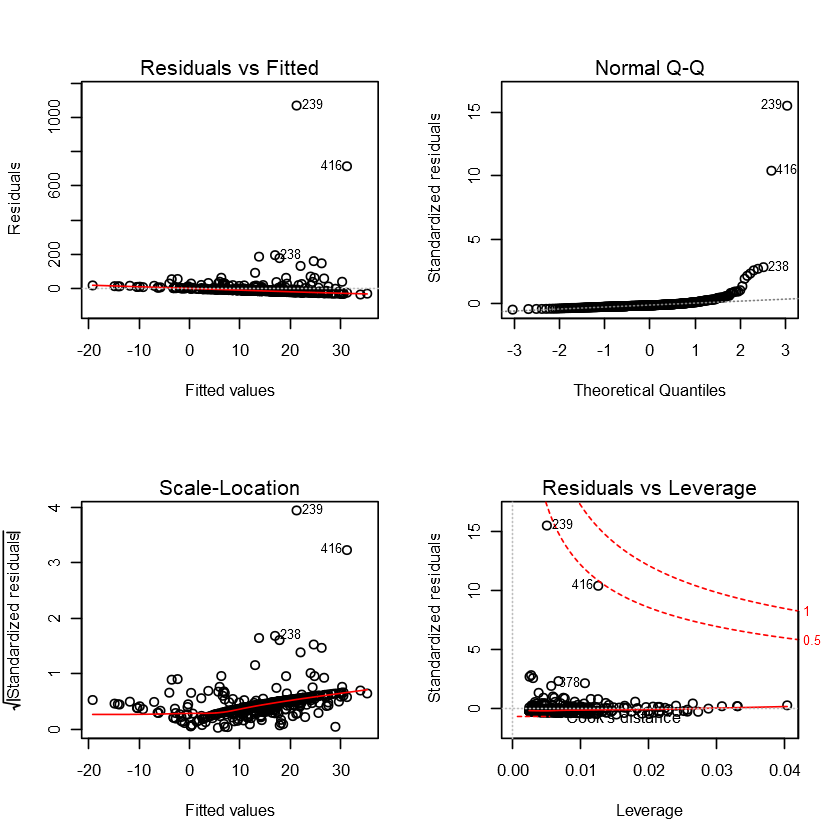

In [26]:
# Plot model
par(mfrow=c(2,2))
plot(fit1)

The model plots show:
- `Residual vs Fitted` - the residual almost evenly spread around horizontal line(around 0 as we wish error is 0), still there are a few point with high error as the fitted value increases. Therefore, it is not perfectly fitted and it doesn't show non-linear pattern.
- `Normal Q-Q` - the residuals fitted the theoretical line in the beginning but deviate from the dashed line at the end, meaning the residuals are almost normally distributed but all point fitted on the line is more preferable.
- `Scale-Location` - this graph shows that the residuals don't spread randomly instead it spread wider along the range of predictor. Therefore, this model definitely violates the assumption of equal variance or Homoscedasticity.
- `Residuals vs Leverage` - In this graph, pattern doesn't matter unlike the others yet it tells if there is any influential point inside Cook's distance line, in this case, the graph show there are two data points which almost lie inside to the Cook's distance line.

Let's check **outlier** using outlierTest()

In [27]:
outlierTest(fit1, cutoff=0.05, digits = 1)

    rstudent unadjusted p-value Bonferroni p
239 24.10883         1.5124e-80   6.2461e-78
416 12.12286         4.1424e-29   1.7108e-26

We can see that Bonferroni adjusted p-value is very small (adjusted p <0.05) indicating that null hypothesis(observation isn't outlier) can be rejected. In other words, these two are the most extreme observation in our data.

Let see if these are influential

Warning message in plot.window(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in box(...):
""id.method" is not a graphical parameter"
Warning message in title(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"


,StudRes,Hat,CookD
416,12.1228593,0.01258016,0.460267661
5,0.2038651,0.03308667,0.000475167
239,24.1088265,0.00503116,0.405634478
380,0.2834191,0.04035940,0.001128622


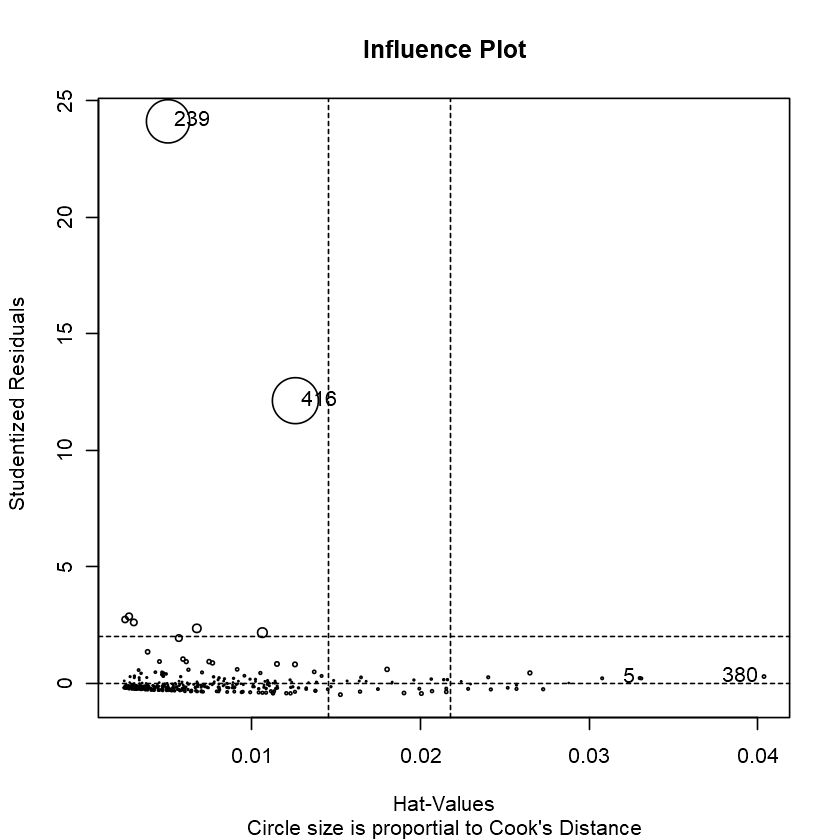

In [28]:
influencePlot(fit1, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In the influence plot, Hat-Values show leverage level. Those toward right are tend to have higher leverage. 
The large studentized residual means the model has made a poor prediction for this sample and is generally deemed the point an outlier.
As you can see, the point 416 and 289 have low leverage but high studentized residuals so the model might be better if we cut these off.

However, we shall see transformation first before making a decision.

### Add transformation
Account for the Heteroscedasticity
The second model using a **log transformation** of the response variable **area** and **ISI** predictor variables as the distributions of both improve when applying log transformation and correlation between log(area+1) and others is also better.

In [29]:
# Update first model named fit2 and summarize
fit2 = lm(log(area+1) ~ . + log(ISI+1), data=train)
summary(fit2)

Warning message:
"contrasts dropped from factor month due to missing levels"



Call:
lm(formula = log(area + 1) ~ . + log(ISI + 1), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1435 -1.0064 -0.4407  0.8528  5.2151 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.056873   2.124584  -0.027  0.97866   
X2            0.070207   0.291952   0.240  0.81009   
X3           -0.676602   0.335171  -2.019  0.04424 * 
X4           -0.060376   0.305324  -0.198  0.84335   
X5           -0.472661   0.410811  -1.151  0.25065   
X6            0.005002   0.322287   0.016  0.98763   
X7           -0.453113   0.335451  -1.351  0.17759   
X8           -0.194486   0.435162  -0.447  0.65519   
X9            1.479884   0.625890   2.364  0.01857 * 
Y2            0.415577   0.362739   1.146  0.25267   
Y3            0.481123   0.311880   1.543  0.12376   
Y4            0.282630   0.325373   0.869  0.38561   
Y5            0.692699   0.458579   1.511  0.13175   
Y6            4.237736   1.488917   2.846  0.00467 **
Y7           

From the summary of the model:
- The `F-statistic` of 1.573 with p-value of 0.01858 is not quite significant, so this model seem to be less linear trend.
- The `$R^2$` value shows the model explains 5.146% of the variance, so transformation using logs is improving the model in more explanation.
- `Residual standard error` significantly reduce to 1.385 which is a good sign.
- The p-values of the coefficients show that only DMC, some months and some X, Y are significant variables. 

**Notice** that you might see warning message due to missing month, this occur since some months have just one or two observations and they are not in train set. This issue could be fixed by drop those months with just one or two observations just like we mentioned in the previous section or perform resampling cross validation <br>

Run step to remove unnecessary variables

In [30]:
# Using step and summarize
fit2 = step(fit2)
summary(fit2)

Start:  AIC=307.09
log(area + 1) ~ X + Y + month + day + FFMC + DMC + DC + ISI + 
    temp + RH + wind + rain + log(ISI + 1)

               Df Sum of Sq    RSS    AIC
- day           6     4.257 719.98 297.54
- month        10    31.185 746.91 304.70
- FFMC          1     0.003 715.73 305.09
- RH            1     0.057 715.78 305.12
- log(ISI + 1)  1     0.073 715.79 305.13
- ISI           1     0.252 715.97 305.23
- rain          1     1.770 717.49 306.11
- temp          1     2.120 717.84 306.31
- wind          1     2.638 718.36 306.61
<none>                      715.72 307.09
- DC            1     4.613 720.34 307.74
- X             8    34.648 750.37 310.61
- DMC           1    11.415 727.14 311.62
- Y             6    33.385 749.11 313.91


Warning message:
"contrasts dropped from factor month due to missing levels"



Step:  AIC=297.54
log(area + 1) ~ X + Y + month + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + log(ISI + 1)

               Df Sum of Sq    RSS    AIC
- month        10    31.029 751.01 294.96
- FFMC          1     0.002 719.98 295.54
- log(ISI + 1)  1     0.021 720.00 295.55
- RH            1     0.065 720.04 295.57
- ISI           1     0.144 720.12 295.62
- rain          1     1.733 721.71 296.53
- temp          1     2.555 722.53 297.00
- wind          1     2.826 722.81 297.15
<none>                      719.98 297.54
- DC            1     4.735 724.71 298.24
- X             8    35.522 755.50 301.43
- DMC           1    11.412 731.39 302.03
- Y             6    34.627 754.61 304.94

Step:  AIC=294.96
log(area + 1) ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain + log(ISI + 1)

               Df Sum of Sq    RSS    AIC
- ISI           1     0.385 751.39 293.17
- temp          1     0.609 751.62 293.30
- DC            1     1.341 752.35 293.70
- log(ISI + 


Call:
lm(formula = log(area + 1) ~ X + Y + DMC + RH + wind, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4273 -1.0653 -0.4600  0.8446  5.6591 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.710780   0.391171   1.817  0.06997 . 
X2          -0.010386   0.287768  -0.036  0.97123   
X3          -0.743793   0.330155  -2.253  0.02482 * 
X4          -0.045872   0.299737  -0.153  0.87845   
X5          -0.581923   0.399206  -1.458  0.14572   
X6          -0.013422   0.313972  -0.043  0.96592   
X7          -0.490427   0.324930  -1.509  0.13201   
X8          -0.332028   0.427800  -0.776  0.43814   
X9           1.234902   0.585652   2.109  0.03561 * 
Y2           0.385415   0.346146   1.113  0.26619   
Y3           0.509215   0.302136   1.685  0.09270 . 
Y4           0.315560   0.315275   1.001  0.31749   
Y5           0.702741   0.444380   1.581  0.11459   
Y6           4.408629   1.463067   3.013  0.00275 **
Y7          -1.632557

Step has removed many variable. `Adjusted $R^2$` value reduce from 5.146% to 4.819%, more over, `F-statistic` in this case is significant at 0.005 level which means this model provides a stronger evidence against the null hypothesis so response variable and predictors are linearly related. The increase in F-statistic affecting reduction in Adjusted $R^2$ since the model become more linear as some variables were removed and it loses a little ability in model explanation.

However, the $R^2$ value shown above is calculated basically on the predicted log of the price, change it back to original form

In [31]:
# Set parameter 
p = length(fit2$coefficient)-1  # number of predictor is no. of coefficient -1
df = fit2$df  # degree of freedom
cat('There are', nrow(train), 'observations and', p, 'predictors in this model.\n\n') # Add explanation
# fit data and take exponential back(get rid of log) for the real value of area
train.predict_2 = exp(fit2$fitted.values)
cat("R-Squared:",Model.Accuracy(train.predict_2, train$area, df, p)$rsquared, '\n')

There are 413 observations and 17 predictors in this model.

R-Squared: -0.002128543 


It turns out to be that $R^2$ become negative which is worse than $R^2$ of the original model. This might be because of transformation. However, we will decide whether good or bad model upon accuracy using `RMSE` as criteria on the next part.

Check the residuals using the plot function 

Warning message:
"not plotting observations with leverage one:
  243"
Warning message:
"not plotting observations with leverage one:
  243"


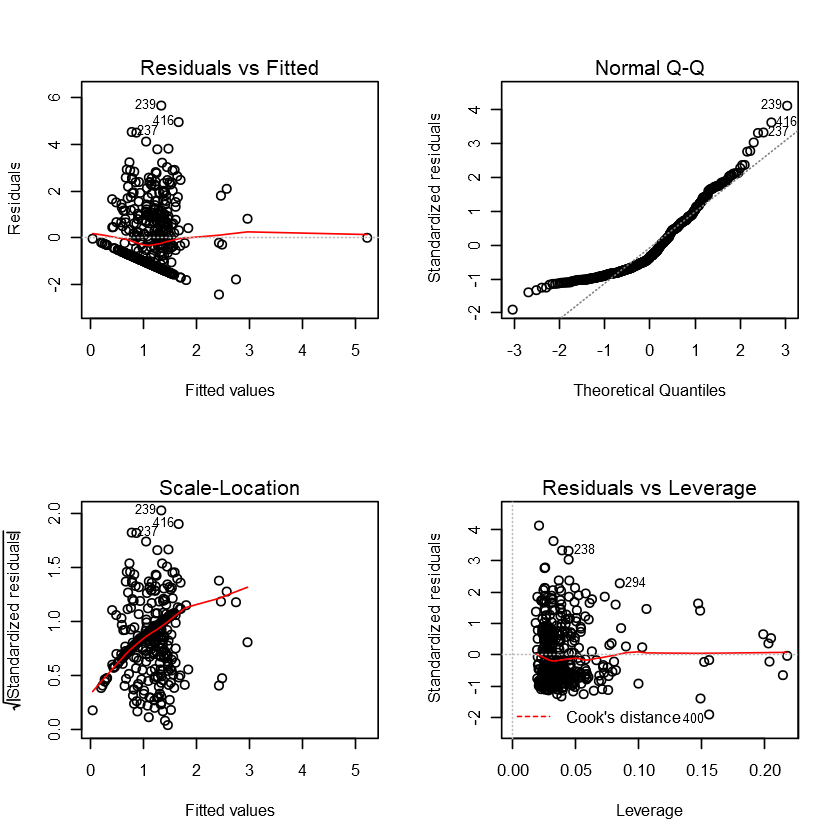

In [32]:
# Plot model
par(mfrow=c(2,2))
plot(fit2)

The model plots show:

- `Residual vs Fitted`- This still doesn't look right and violate linear assumption. Though the residuals are more evenly distributed, there is some straight line trend. 
- The `scale-location` shows the variance is nearly equal
- The `Normal Q-Q` plot shows that the residuals are not quite normally distributed as it deviates from the theoretical quantiles in both ends.
- `Residual vs Leverage` -There is no outliers inside Cook's distance as we don't see cook's distance.

Estimating the log of area rather than area directly seem to improve model a little. Therefore, we will try another model by adding interaction.<br>
### Add interaction
Add some interaction terms for the correlated variables - month, DMC, temp and DC, also the negative correlation between temp and RH and the correlation between FFMC and ISI, X and Y.<br>
Since adding interaction require original variable in the model, we set new one instead of using fit2.

In [33]:
# Update first model named fit3 and summarize
fit3 = lm(formula = log(area+1) ~ DMC + RH + temp +DC + X +Y +FFMC + ISI
          + DMC:DC + X:Y + FFMC+ISI + temp:DC + temp:DMC + temp:RH, data = train)
summary(fit3)


Call:
lm(formula = log(area + 1) ~ DMC + RH + temp + DC + X + Y + FFMC + 
    ISI + DMC:DC + X:Y + FFMC + ISI + temp:DC + temp:DMC + temp:RH, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1956 -0.9947 -0.3053  0.7955  5.4587 

Coefficients: (27 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.103e+00  1.853e+00   0.596  0.55178   
DMC          2.188e-04  9.586e-03   0.023  0.98180   
RH          -1.046e-02  1.291e-02  -0.810  0.41836   
temp        -1.069e-01  6.003e-02  -1.781  0.07576 . 
DC          -1.017e-03  1.735e-03  -0.586  0.55816   
X2           8.234e-01  4.713e-01   1.747  0.08148 . 
X3          -3.651e+00  2.114e+00  -1.727  0.08510 . 
X4          -1.842e+00  2.187e+00  -0.842  0.40038   
X5          -1.541e+00  2.188e+00  -0.704  0.48182   
X6          -2.558e+00  2.203e+00  -1.161  0.24633   
X7          -1.378e+00  2.202e+00  -0.626  0.53181   
X8          -2.557e+00  1.959e+00  -1.3

Look like none of interaction is significant in this model and only some variables are significant. Anyway let see if we use step to remove some variables.<br>
Use step to remove unimportant variables

In [34]:
# Using step and summarize
fit3 = step(fit3)
summary(fit3)

Start:  AIC=314.21
log(area + 1) ~ DMC + RH + temp + DC + X + Y + FFMC + ISI + DMC:DC + 
    X:Y + FFMC + ISI + temp:DC + temp:DMC + temp:RH

           Df Sum of Sq    RSS    AIC
- X:Y      21    37.613 744.93 293.61
- RH:temp   1     0.080 707.40 312.26
- DMC:DC    1     0.197 707.52 312.32
- ISI       1     0.460 707.78 312.48
- DMC:temp  1     0.537 707.86 312.52
- FFMC      1     0.577 707.90 312.55
- temp:DC   1     2.098 709.42 313.43
<none>                  707.32 314.21

Step:  AIC=293.61
log(area + 1) ~ DMC + RH + temp + DC + X + Y + FFMC + ISI + DMC:DC + 
    temp:DC + DMC:temp + RH:temp

           Df Sum of Sq    RSS    AIC
- RH:temp   1     0.028 744.96 291.62
- DMC:temp  1     0.050 744.98 291.63
- FFMC      1     0.601 745.54 291.94
- ISI       1     1.036 745.97 292.18
- DMC:DC    1     1.899 746.83 292.66
<none>                  744.93 293.61
- temp:DC   1     5.405 750.34 294.59
- X         8    41.833 786.77 300.17
- Y         6    38.408 783.34 302.37

Step:  AIC=2


Call:
lm(formula = log(area + 1) ~ DMC + RH + temp + DC + X + Y + temp:DC, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9449 -1.0344 -0.4828  0.8163  5.6717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.446e+00  6.602e-01   3.706 0.000241 ***
DMC          2.260e-03  1.588e-03   1.423 0.155596    
RH          -1.006e-02  5.579e-03  -1.802 0.072256 .  
temp        -1.057e-01  3.557e-02  -2.973 0.003134 ** 
DC          -2.044e-03  9.616e-04  -2.126 0.034140 *  
X2           3.376e-02  2.866e-01   0.118 0.906282    
X3          -6.935e-01  3.319e-01  -2.089 0.037314 *  
X4          -2.037e-02  3.008e-01  -0.068 0.946056    
X5          -5.096e-01  3.995e-01  -1.275 0.202938    
X6          -5.519e-02  3.146e-01  -0.175 0.860828    
X7          -4.148e-01  3.247e-01  -1.278 0.202124    
X8          -3.529e-01  4.260e-01  -0.829 0.407862    
X9           1.656e+00  6.023e-01   2.749 0.006259 ** 
Y2           4.580e-01  3.

Check the $R^2$ value using the Model.Accuracy function and the residual plots

In [35]:
# Set parameter 
p = length(fit3$coefficient)-1  # number of predictor is no. of coefficient -1
df = fit3$df  # degree of freedom
cat('There are', nrow(train), 'observations and', p, 'predictors in this model.\n\n')  # Add explanation
# fit data and take exponential back(get rid of log) for the real value of area
train.predict_3 = exp(fit3$fitted.values)
cat("R-Squared:",Model.Accuracy(train.predict_3, train$area, df, p)$rsquared, '\n')

There are 413 observations and 19 predictors in this model.

R-Squared: -0.0007017277 


The `$R^2$` value is not different from before when we use log transformation. The `residual plots` below are also don't look right and don't fit linear regression as well. It could be concluded that linear model might not suitable for this set of data as the data itself violate linear assumptions. It could be more suitable if fitting non-linear model.

Let see next model

Warning message:
"not plotting observations with leverage one:
  243"
Warning message:
"not plotting observations with leverage one:
  243"


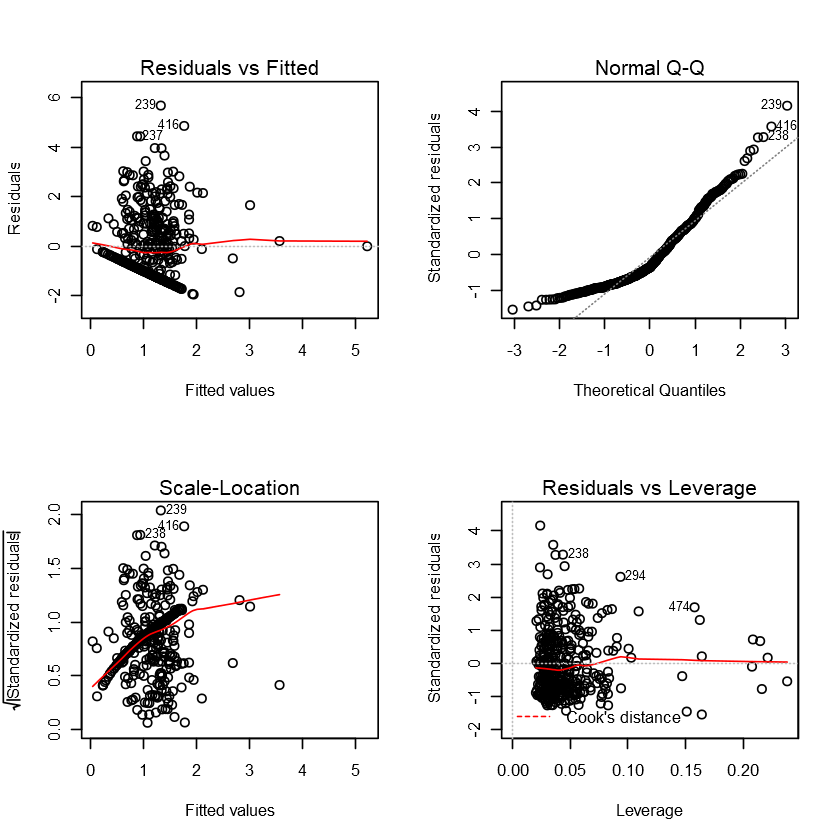

In [36]:
# Plot model
par(mfrow=c(2,2))
plot(fit3)

## Second model
The choice of second model is KNN regressor which use k nearest neighbours for prediction<br>
Starting from building a function to calculate everything at once! The function for KNN is `knn.reg(train = ?, test = ?, y = ?, k = ?)` from FNN packages

In [37]:
# Build a function for RMSE interpretation
make_knn_pred = function(k, train, test) {
  pred = FNN::knn.reg(train = train[,5:12], # the predictors of the training data
                      test = test[,5:12], # the predictor values,x at which we would like to make predictions
                      y = train$area,  # the response for the training data
                      k = k)$pred 
  act  = test$area
  RMSE(predicted = pred, target = act)
}

Since we don't know which k is the best for this model, we will see RMSE for each k and make a decision

In [38]:
# define values of k to evaluate
K = seq(1, 100)
# Build new dataframe to contain error
KNN_error = data.frame('k'= K, 'Train'= rep(0,length(K)), 'Test' = rep(0,length(K)))

# Put error
for (k in K){
    i = k       
    KNN_error[i, 'Train'] = make_knn_pred(k, train, train)
    KNN_error[i, 'Test'] = make_knn_pred(k, train, test)  
    }

# Show head of error
cat('The Error of each K for both train and test set are:')
head(KNN_error)

The Error of each K for both train and test set are:

k,Train,Test
1,2.891895,39.59578
2,45.377481,64.05058
3,56.051111,49.84638
4,56.907836,45.30541
5,58.165609,40.96496
6,59.921669,38.33641


Now choosing K base on train and test error is challenging as we want low test error

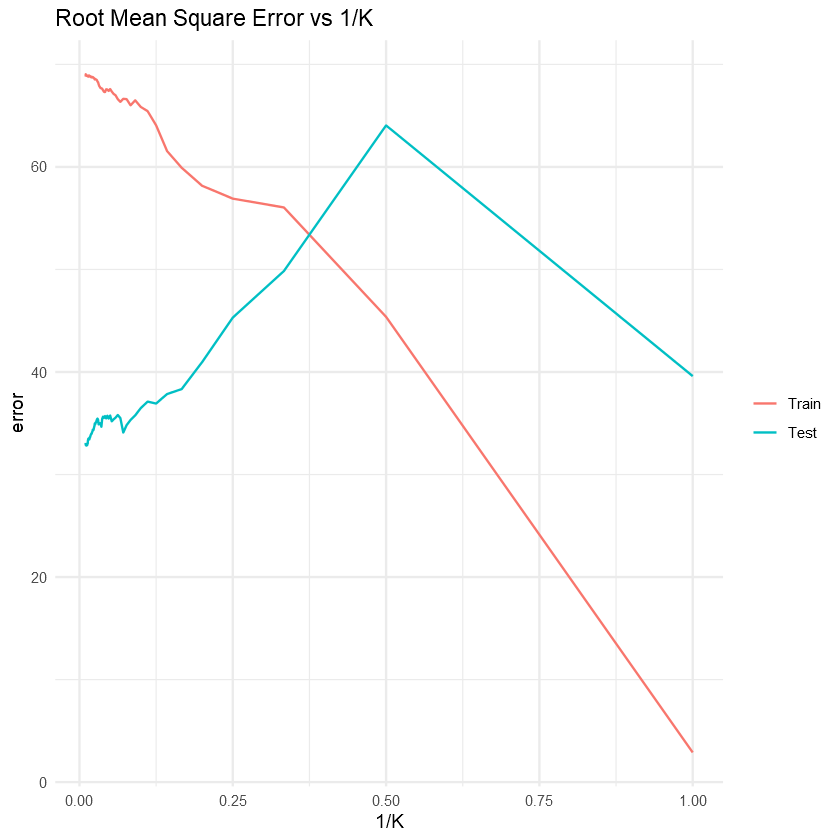

In [39]:
# reshape for visualization
KNN_rmse <- melt(KNN_error, id='k') 
names(KNN_rmse) <- c('K', 'type', 'error')
# plot error for train and test data sets
ggplot(data=KNN_rmse, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Root Mean Square Error vs 1/K")

In [40]:
# determine "best" k
best_k = which.min(KNN_error[,3])
best_k

[1] 89

As $1/K$ increases, in other words `model complexity` increases, the error of train error drop sharply but the test error rises until reaches its peak and then starting to reduce. If we choose according to the `test error`, it would be at the beginning in the graph or at `K equals 89` as shown above. This is like a trade off between both error. However, if choosing a little more complex model, we would choose where both line cross each other as optimal point.

## Third model
In the third model, we will use `regsubsets` to see the overall impact of each element toward the target variable `area`. Let try both forward and backward to see if the outcome will be the same.<br>
Starting with **Backward**!

In [41]:
# Backward stepwise adn summarize
final_fit <- regsubsets(area ~ ., data =data, nvmax = 10, method = "backward")
final_fit.summary <- summary(final_fit)
final_fit.summary

Subset selection object
Call: regsubsets.formula(area ~ ., data = data, nvmax = 10, method = "backward")
39 Variables  (and intercept)
        Forced in Forced out
X2          FALSE      FALSE
X3          FALSE      FALSE
X4          FALSE      FALSE
X5          FALSE      FALSE
X6          FALSE      FALSE
X7          FALSE      FALSE
X8          FALSE      FALSE
X9          FALSE      FALSE
Y2          FALSE      FALSE
Y3          FALSE      FALSE
Y4          FALSE      FALSE
Y5          FALSE      FALSE
Y6          FALSE      FALSE
Y7          FALSE      FALSE
month2      FALSE      FALSE
month3      FALSE      FALSE
month4      FALSE      FALSE
month5      FALSE      FALSE
month6      FALSE      FALSE
month7      FALSE      FALSE
month8      FALSE      FALSE
month9      FALSE      FALSE
month10     FALSE      FALSE
month11     FALSE      FALSE
month12     FALSE      FALSE
day2        FALSE      FALSE
day3        FALSE      FALSE
day4        FALSE      FALSE
day5        FALSE      F

As you can see, if we assume at most 10 parameters, the best four parameters are $X6$, $Y6$, $day3$ and $temp$ which are the generated best subset using backward stepwise. The question is what is the best number of parameters we should include. Therefore, we generates a set of plots to identify the best overall model as follows.

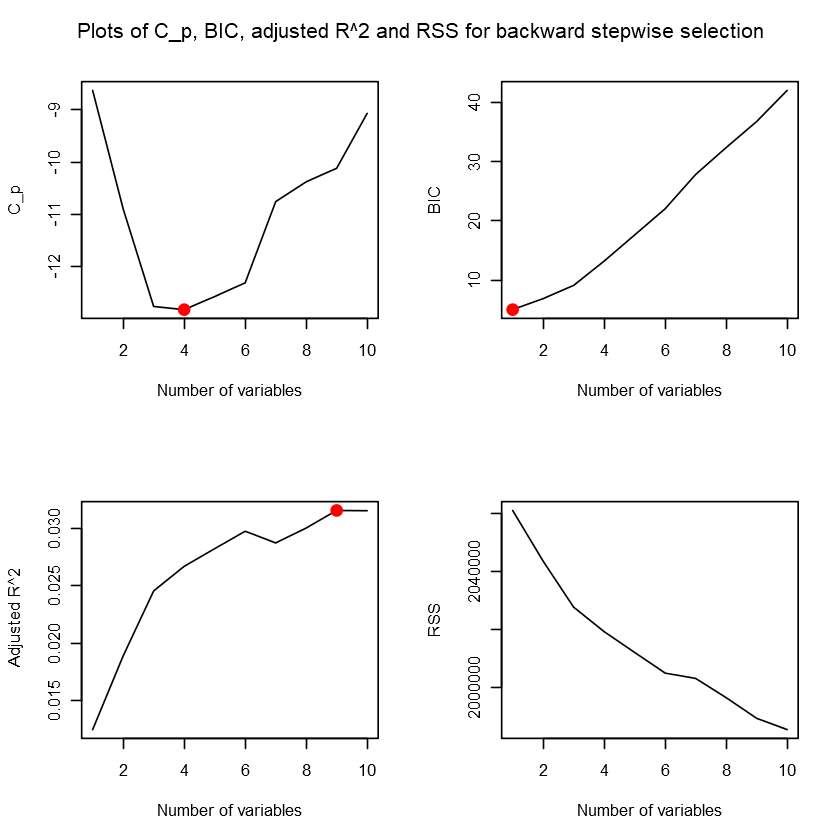

In [42]:
# Plot Cp, BIC, R Square and RSS
par(mfrow = c(2, 2))
plot(final_fit.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(final_fit.summary$cp), final_fit.summary$cp[which.min(final_fit.summary$cp)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(final_fit.summary$bic), final_fit.summary$bic[which.min(final_fit.summary$bic)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(final_fit.summary$adjr2), final_fit.summary$adjr2[which.max(final_fit.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

From the figures
- $Cp$ suggests the number of parameter of this model should be 4 since the least value of $Cp$ is at this point
- $BIC$ suggests at 1 parameter which is too simple yet yield the least $BIC$
- $Adjusted R^2$ suggests at 9 parameters which is the highest value of $Adjusted R^2$
- While $RSS$ shows that the more number of parameter the less $RSS$ 

Since all of them shown different result, we shall see forward stepwise<br>
Next let try selecting using **Forward method**.

In [43]:
# Forward stepwise adn summarize
final_fit <- regsubsets(area ~ ., data =data, nvmax = 10, method = "forward")
final_fit.summary <- summary(final_fit)
final_fit.summary

Subset selection object
Call: regsubsets.formula(area ~ ., data = data, nvmax = 10, method = "forward")
39 Variables  (and intercept)
        Forced in Forced out
X2          FALSE      FALSE
X3          FALSE      FALSE
X4          FALSE      FALSE
X5          FALSE      FALSE
X6          FALSE      FALSE
X7          FALSE      FALSE
X8          FALSE      FALSE
X9          FALSE      FALSE
Y2          FALSE      FALSE
Y3          FALSE      FALSE
Y4          FALSE      FALSE
Y5          FALSE      FALSE
Y6          FALSE      FALSE
Y7          FALSE      FALSE
month2      FALSE      FALSE
month3      FALSE      FALSE
month4      FALSE      FALSE
month5      FALSE      FALSE
month6      FALSE      FALSE
month7      FALSE      FALSE
month8      FALSE      FALSE
month9      FALSE      FALSE
month10     FALSE      FALSE
month11     FALSE      FALSE
month12     FALSE      FALSE
day2        FALSE      FALSE
day3        FALSE      FALSE
day4        FALSE      FALSE
day5        FALSE      FA

For forward stepwise, assuming at most 10 parameters, the four best parameters are $X6$, $Y6$, $day3$ and $temp$ which is the same subset as backward method. In order to decide how many parameter to go with, generate a set of plots to identify the best overall model as follows.

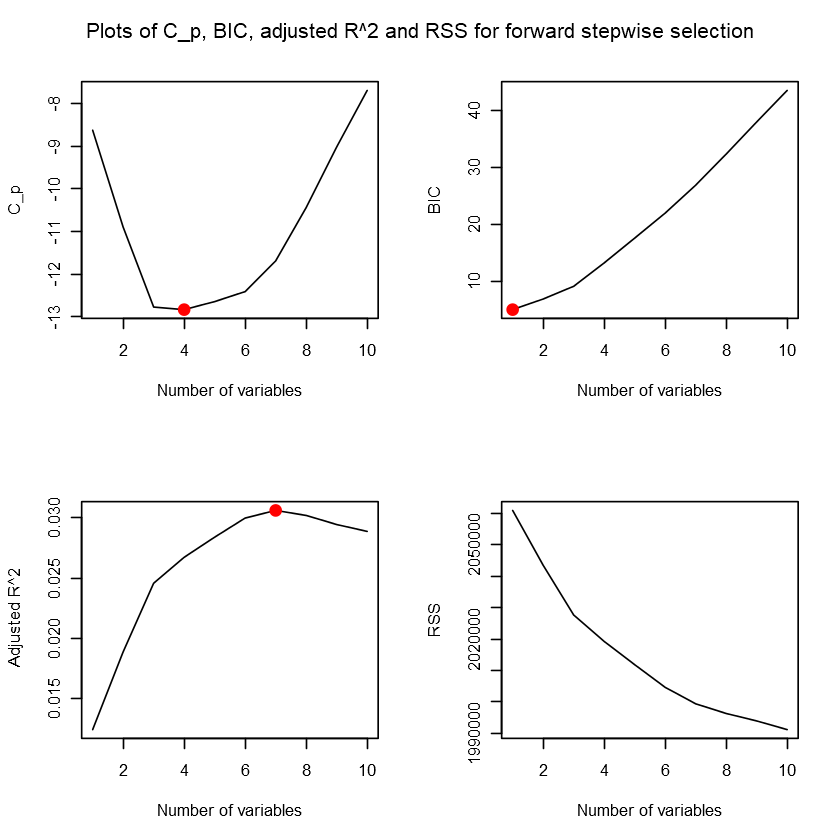

In [44]:
# Plot Cp, BIC, R Square and RSS
par(mfrow = c(2, 2))
plot(final_fit.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(final_fit.summary$cp), final_fit.summary$cp[which.min(final_fit.summary$cp)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(final_fit.summary$bic), final_fit.summary$bic[which.min(final_fit.summary$bic)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(final_fit.summary$adjr2), final_fit.summary$adjr2[which.max(final_fit.summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(final_fit.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

From this figures
- $Cp$ suggests the same number of parameter as backward which is 4 for a model
- $BIC$ suggests at 1 parameter which is the same
- $Adjusted R^2$ suggests at 7 parameters as for forward stepwise it gives the highest $Adjusted R^2$  while it is 9 in backward stepwise

Therefore, we might go with `4 parameters` since both methods suggest the same things. After this feature selection, we will perform both `Ridge and Lasso regularizations` as for the third model. These regularizations will shrink the estimated coefficient toward zero. The only difference between the two regularization methods is the way they penalize the estimated parameters of model. The Ridge regularization will shrink all the estimated parameters towards zero, but never equal to zero. In contrast, the Lasso regularization will force some of the estimated parameters to be zero.

**Starting with Ridge!**

Since now, we are going to fit a ridge regression model on the train set, with the shrinkage parameter (or tunning)  𝜆  chosen by cross-validation, the train data taken by the glmnet function should be a matrix. So we store all the train and test datasets in two matrices.

In [45]:
# Make train and test into matrix
train.mat <- model.matrix(area ~ X + Y + day + temp, data = train)[,-1]
test.mat <- model.matrix(area ~  X + Y + day + temp, data = test)[,-1]

Then, we generate a list of lambda values that will be used in cross-validation and we are ready to fit the model.
Note that for glmnet function:
- `Ridge` is when $\alpha$ (alpha) equal `0`
- `Lass`o is when $\alpha$ (alpha) equal `1`

In [46]:
# Set grid for random lambda (only once)
grid <- 10^seq(4, -2, length = 100)

# the purpose of fixing the seed of the random number generator is to make the result repeatable.
set.seed(1)
# Perform ridge regression
fit.ridge <- glmnet(train.mat, train$area, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge <- cv.glmnet(train.mat, train$area, alpha = 0, lambda = grid, thresh = 1e-12)

# Find best lambda
bestlam.ridge <- cv.ridge$lambda.min
# Show best lambda
cat('The best lambda for ridge regression is',bestlam.ridge)

The best lambda for ridge regression is 5722.368

The ridge lambda is quite big indicating more control of model, in other words less complexity which could lead to underfitting. This is not quite a good sign but we shall see how lasso perform then compare the accuracy.

Next generate for **Lasso** regression

In [47]:
# the purpose of fixing the seed of the random number generator is to make the result repeatable.
set.seed(1)
# Perform lasso regression
fit.lasso <- glmnet(train.mat, train$area, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, train$area, alpha = 1, lambda = grid, thresh = 1e-12)

# Find best lambda
bestlam.lasso <- cv.lasso$lambda.min
# Show best lambda
cat('The best lambda for ridge regression is',bestlam.lasso)

The best lambda for ridge regression is 4977.024

The lasso lambda is not different to ridge since both are big numbers(add more penalty) which is less control and makes model more simple. Let see the accuracy in the next part!

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>
The model can be compared using RMSE or root mean square error function mentioned above. 

First we make a function to compare all sub models of `multiple linear regression for model 1` following by `KNN regressor(model 2)` and `Ridge and Lasso regression(model 3)`

In [48]:
# Make function to compare for model1
make_fit_pred = function(target) {
    # Predict of 3 sub model
    predict_1 = predict(fit1, target)
    predict_2 = exp(predict(fit2, target))
    predict_3 = exp(predict(fit3, target))
    # Actual value
    act  = target$area
    # Calculate RMSE
    RMSE1 = RMSE(predicted = predict_1, target = act)
    RMSE2 = RMSE(predicted = predict_2, target = act)
    RMSE3 = RMSE(predicted = predict_3, target = act)
    
    return (c(RMSE1, RMSE2, RMSE3))
}

After building a function put models' error in data frames for convenient

In [49]:
options(warn=-1)
# Build dataframe for error 
RMSE_regression = data.frame('Model'= 1:3, 'Train'=rep(0,3), 'Test' =rep(0,3))
# Add error using loop
for (i in 1:3){
    RMSE_regression[i,'Train'] = make_fit_pred(train)[[i]]        
    RMSE_regression[i,'Test'] = make_fit_pred(test)[[i]]  
}

Further more, put all error of ridge and lasso regression altogether

In [50]:
# Build dataframe for error 
RMSE_reg = data.frame('Model'= 1:2, 'Train'=rep(0,2), 'Test' =rep(0,2))
# Ridge prediction
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
tpred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = train.mat)
# Lasso prediction
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
tpred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = train.mat)
# Add into dataframe
RMSE_reg[1,'Train'] = RMSE(tpred.ridge, train$area)   
RMSE_reg[1,'Test'] = RMSE(pred.ridge, test$area)
RMSE_reg[2,'Train'] = RMSE(tpred.lasso, train$area)     
RMSE_reg[2,'Test'] = RMSE(pred.lasso, test$area)

Now, we are ready to compare error through these model performance metrics of three of the following model:
- Model1: Multiple linear regression (full, log-transform, interaction)
- Model2: KNN regressor
- Model3: Ridge and Lasso regression

#### Multiple linear regression performance metric

In [51]:
RMSE_regression

Model,Train,Test
1,68.87175,32.32209
2,69.49131,31.25653
3,69.44182,31.36631


#### KNN regressor performance metric

In [52]:
options(warn=0)
KNN_error[which.min(KNN_error[,3]),]

,k,Train,Test
89,89,68.91008,32.8209


#### Ridge and Lasso regression performance metric

In [53]:
RMSE_reg

Model,Train,Test
1,69.36565,31.20559
2,69.41747,31.20747


The performance metrics show:
- As you can see all performance metrics of different models, the `train and test errors are approximately at 69 and 31.5` respectively. No matter how we try to develop our model in three different ways or even remove outlier(try but not included here), yet the model performance doesn't improve much. 
- After apply log transformation to the first `multiple linear regression model`, test error slightly decrease but adding interaction don't make model performance much better.
- More over, `Ridge and Lasso` are usually use to deal with overfitting problem, yet in this case, we use for feature selection and see whether adding penalty would help improving the model or not. It turns out that applying these two don't enhance much yet it give a little less both train and test error(This might be because of cross validation). So in this particular data set, Ridge and Lasso regression perform a bit better than the multiple linear regression.
- This `KNN regressor` model at K equals 89 is quite less complex yet it yield the least test error. However, using 86 nearest neighbor to predict the target variable is less accurate or there is more probability of wrong prediction since the data set doesn't comply with this method much. So the model that gives the least error is Ridge and Lasso regression.
- Besides, there are some evidences in the previous section indicating that `non-linear model` could be more suitable than linear model. Therefore, it can be concluded that linear model is not suitable for this data set unless a lot of transformation and data adjustment could possibly make it into linear one.


## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In order to identify the key factors that have strong effects on the burned area, on other words, the attribute that contributes the most to model performance, we will choose based on correlation analysis and stepwise subset selection as we have seen in previous section.

Let see **correlation** first

In [54]:
# Load the dataset
data <- read.csv("forestfires.csv",header=T)
data$X = as.factor(data$X)
data$Y = as.factor(data$Y)

# Plot correlation
cor(data[,-c(1, 2, 3, 4)])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.00000000,0.38261880,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,0.38261880,1.00000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,0.33051180,0.68219161,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.53180493,0.30512783,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,0.43153226,0.46959384,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,-0.30099542,0.07379494,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,-0.02848481,-0.10534225,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.05670153,0.07478998,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729
area,0.04012200,0.07299430,0.04938323,0.008257688,0.09784411,-0.07551856,0.01231728,-0.007365729,1.000000000


From the correlation table (this is the same table as in the exploration section):
- The variable that has comparatively strong association with area are `temp`, `DMC` and `RH`(negative). As you might notice, these variable often exists in almost every model that we perform which we can concluded that these three contribute in model performance the most.
- More over, the variables that have comparatively high correlation with those top association variable also influence the target variable in one way or the other.
- For example, `DC` appears to affect area since it has strong correlation with DMC.
- Note that `rain` has a very little effect on the target variable, in other words, we can ignore it.

Now let see forward feature selection of full model

In [55]:
# Forward feature selection
key_fac = regsubsets(area ~ ., data =data, nvmax = 27, method = "forward")
summary(key_fac)

Subset selection object
Call: regsubsets.formula(area ~ ., data = data, nvmax = 27, method = "forward")
39 Variables  (and intercept)
         Forced in Forced out
X2           FALSE      FALSE
X3           FALSE      FALSE
X4           FALSE      FALSE
X5           FALSE      FALSE
X6           FALSE      FALSE
X7           FALSE      FALSE
X8           FALSE      FALSE
X9           FALSE      FALSE
Y3           FALSE      FALSE
Y4           FALSE      FALSE
Y5           FALSE      FALSE
Y6           FALSE      FALSE
Y8           FALSE      FALSE
Y9           FALSE      FALSE
monthaug     FALSE      FALSE
monthdec     FALSE      FALSE
monthfeb     FALSE      FALSE
monthjan     FALSE      FALSE
monthjul     FALSE      FALSE
monthjun     FALSE      FALSE
monthmar     FALSE      FALSE
monthmay     FALSE      FALSE
monthnov     FALSE      FALSE
monthoct     FALSE      FALSE
monthsep     FALSE      FALSE
daymon       FALSE      FALSE
daysat       FALSE      FALSE
daysun       FALSE      FA

According to the forward feature selection allowing maximum 27 parameters in a model, we can see that the first 20 factors that contributes to model the most are:
- `Y8`
- `temperature`
- `day sat`
- `X6`
- `Y6`
- `month sep`
- `wind`
- `Y3`
- `X3`
- `X5`
- `DC index `
- `DMC index`
- `month oct`
- `month dec`
- `month aug`
- `month jul`
- `day thu`
- `X8`
- `month mar`
- `ISI`

There are a few categorical variable since some tend to be more in number of burning area if you remember from the Exploratory Data Analysis part so that is the reason why this subsets of variables could have high effect towards area (target variable). More over, you could see that `temperature and DC` which both have high correlation with area are also in the top 20 list plus DC which has some association with DMC
But the interesting thing is `wind`. This variable has weak correlation with all other variable, yet it is in a good rank of top 20 when putting into a model.
`ISI` is another variable that has less correlation with other variables, but it is the last place in the top 20 lists.

Therefore, it can be concluded that apart from high correlated variable with area, some categorical variables are also influential as well as some low interaction correlation variable.

## 6. Conclusion <a class="anchor" id="sec_6"></a>
In conclusion, we can predict this data set assuming linear regression yet the accurate is not good enough and the data itself violates linear regression assumption, though there are many variables contribute to model performance, using linear model still not good in practical. Therefore, it is suggested that non-linear model or there could be other type of model that is suitable for this data set and yield a better model performance.

## 7. References <a class="anchor" id="sec_7"></a>
- https://www.quora.com/Can-adjusted-R-square-of-a-regression-be-negative
- https://www.investopedia.com/terms/r/residual-standard-deviation.asp
- https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2
- https://www.r-bloggers.com/how-do-i-interpret-the-aic/
- https://ademos.people.uic.edu/Chapter12.html#32_testing_for_outliers:_outliertest()
- https://data.library.virginia.edu/diagnostic-plots/
- https://online.stat.psu.edu/stat501/lesson/11/11.3
- https://www.r-bloggers.com/variable-importance-plot-and-variable-selection/
- http://www.semspirit.com/artificial-intelligence/machine-learning/regression/support-vector-regression/support-vector-regression-in-r/
- https://machinelearningmastery.com/non-linear-regression-in-r/
- https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
- House price prediction-20200325 from the unit